In [129]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib qt
import matplotlib.pyplot as plt
import plotly.express as px
import itertools

In [130]:
## globals args
data_root_dir = os.getcwd() + '/plots_vae/'
vae_model = 'CrossingMultiGoal-S11-v7N2-v7N3-v3N1-20-ckpt-4'

agent_models = [
               'CrossingMultiGoal-v3-s1-seed0-goalgreen-S11N1-maxstep4-new',
               'CrossingMultiGoal-v7-s1-seed0-goalgreen-S11N2-maxstep4-new',
               'CrossingMultiGoal-v7-s1-seed0-goalgreen-S11N3-maxstep4-new',
               ]

In [151]:
## load embeddings
embeddings = []
embeddings_sep = []
labels = []
label_counts = []

for idx, agent in enumerate(agent_models):
    embedding_dir = data_root_dir + vae_model + '/' + agent + '/'
    embed = np.load(embedding_dir + 'embeddings-test.npy')
    labels.append([idx] * len(embed))
    label_counts.append(len(embed))
    embeddings.append(embed)
    # embeddings_sep.append((embed - embed.mean(0, keepdims=True)) / embed.std(axis=0))
    embeddings_sep.append(embed / np.linalg.norm(embed, 2))

embeddings = np.concatenate(embeddings)
embeddings = (embeddings - embeddings.mean(0, keepdims=True)) / embeddings.std(axis=0)
labels = list(itertools.chain(*labels))
agent_dict = {0: "v3N1", 1:"v7N2", 2:"v7N3"} 
models = list(map(agent_dict.get, labels))

In [35]:
color_dict = {0:'#14213D', 1:'#FCA311', 2:'#976391'}
# 0: 14213D
# 1: FCA311
# 2: 976391
colors = list(map(color_dict.get, labels))

In [66]:
# pca = PCA(n_components=3)
pca = PCA(n_components=2)
embeds_pca = pca.fit_transform(embeddings)

## draw PCA using matplotlib
# ax= plt.figure().add_subplot(projection='3d')
# # ax= plt.figure().add_subplot()

# ax.scatter(reduced_embeds[:,0],
#             reduced_embeds[:,1],
#             reduced_embeds[:,2],
#             c = colors)

# plt.show()

In [67]:
## draw PCA using plotly

df_pca = pd.DataFrame(embeds_pca, columns=['pca_1', 'pca_2'])
df_pca['agent_model'] = models

# fig = px.scatter_matrix(reduced_embeds,
#                         labels=labels,
#                         dimensions=range(3),
#                         color=colors)
# fig.update_traces(diagonal_visible=False)

# fig = px.scatter_3d(reduced_embeds,
                    # x=0, y=1, z=2,
                    # color=colors)

fig = px.scatter(df_pca, 
                 x="pca_1", y="pca_2",
                #  color_discrete_sequence=["#14213D", "#FCA311", "#976391"],
                 color="agent_model",
                 title='PCA of embeddings -- train data',)
fig.update_layout(margin=dict(l=25, r=25, t=25, b=25),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  title_x=0.5)

fig.show()

In [152]:
## similarity matrix

sim_matrix = np.zeros([len(agent_models), len(agent_models)])
for l1 in range(len(agent_models)):
    for l2 in range(len(agent_models)):
        if l1 != l2:
            sim_matrix[l1, l2] = cosine_similarity(embeddings_sep[l1], embeddings_sep[l2]).mean()
        else:
            mask = np.ones([len(embeddings_sep[l1]),len(embeddings_sep[l2])], dtype=bool)
            np.fill_diagonal(mask, 0)
            sim_matrix[l1, l2] = (cosine_similarity(embeddings_sep[l1], embeddings_sep[l2])*mask).mean()

## plot similarity matrix
fig = px.imshow(sim_matrix,
                labels=dict(x="agent type", y="agent type", color="similarity"),
                x=['v3N1', 'v7N2', 'v7N3'],
                y=['v3N1', 'v7N2', 'v7N3'],
                text_auto=True
               )
fig.update_xaxes(side="top")
fig.show()

In [74]:
## separate by LDA

lda = LinearDiscriminantAnalysis(n_components=2)
embeds_lda = lda.fit_transform(embeddings, labels)
# embeds_lda = lda.transform(embeddings)

## draw LDA using plotly

df_lda = pd.DataFrame(embeds_lda, columns=['lda_1', 'lda_2'])
df_lda['agent_model'] = models

fig = px.scatter(df_lda, 
                 x="lda_1", y="lda_2",
                #  color_discrete_sequence=["#14213D", "#FCA311", "#976391"],
                 color="agent_model",
                 title='LDA of embeddings -- train data',)
fig.update_layout(margin=dict(l=25, r=25, t=25, b=25),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  title_x=0.5)

fig.show()

NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.000s...
[t-SNE] Computed neighbors for 171 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 5.960130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.065639
[t-SNE] KL divergence after 1000 iterations: 0.744575


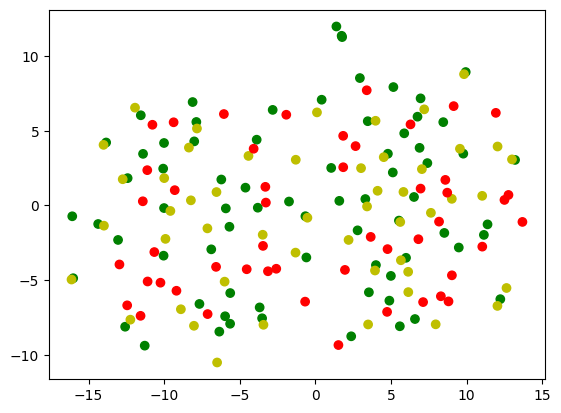

In [186]:
# tsne = TSNE(3, verbose=1)
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(embeddings)

# ax = plt.figure().add_subplot(projection='3d')
ax = plt.figure().add_subplot()
plt.scatter(tsne_proj[:,0],
            tsne_proj[:,1],
            # tsne_proj[:,2],
            c = colors)